In [21]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl
import folium
import json
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Define the path
path = r"C:\Users\repla\Documents\Exercise 6\4 - Analysis\Visualizations"

In [3]:

#Importing Data Set
df = pd.read_csv(r"C:\Users\repla\Documents\Exercise 6\2 - Data\Prepared Data\gun_violence_data_cleaned2.csv", index_col = False)

## Creating a Subset of the Data

In [4]:
# Create a subset that only includes our numerical values

sub1 = df[['n_participants', 'n_killed', 'n_injured', 'victims','suspects']]

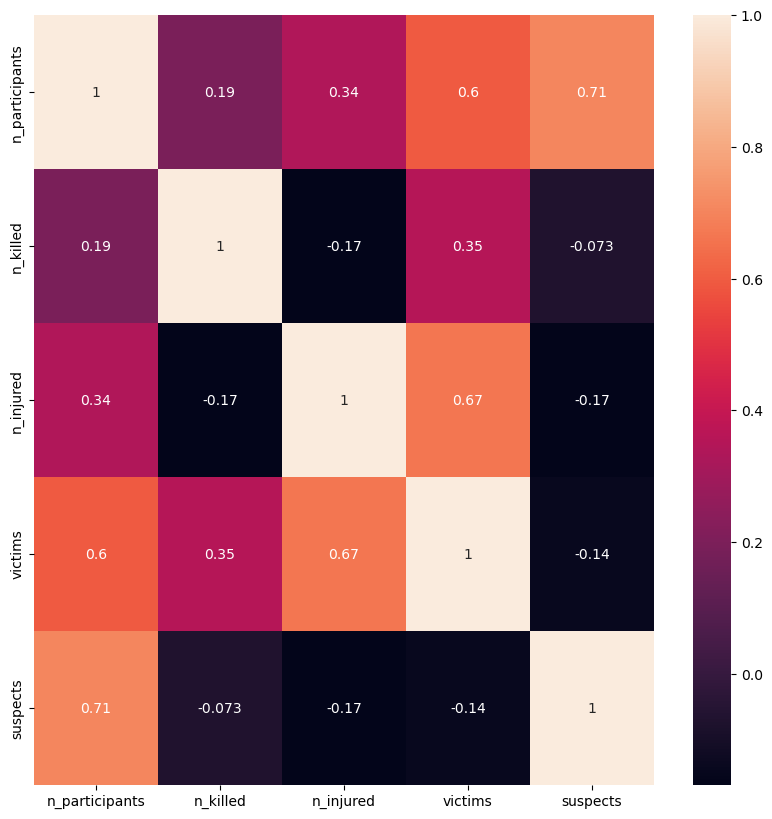

In [7]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub1.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [8]:
# Save the correlation heatmap as an image file
corr.figure.savefig(r"C:\Users\repla\Documents\Exercise 6\4 - Analysis\Visualizations\correlation_heatmap.png")

C:\Users\repla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


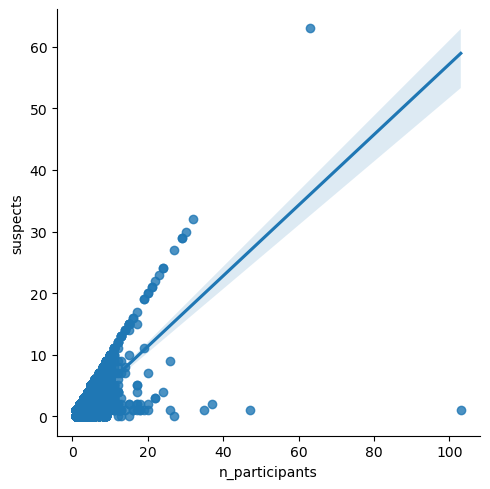

In [17]:
# Create a scatterplot for the "n_participants" and "suspects" columns in seaborn

sns.lmplot(x = 'n_participants', y = 'suspects', data = sub1)
plt.savefig(r"C:\Users\repla\Documents\Exercise 6\4 - Analysis\Visualizations\part.suspectsscatterplot.png")

C:\Users\repla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


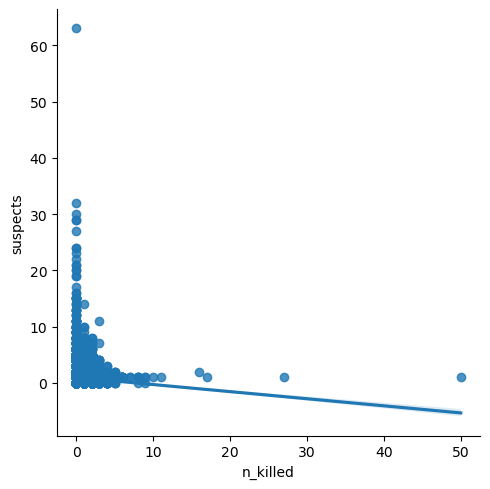

In [10]:
sns.lmplot(x = 'n_killed', y = 'suspects', data = sub1)

C:\Users\repla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


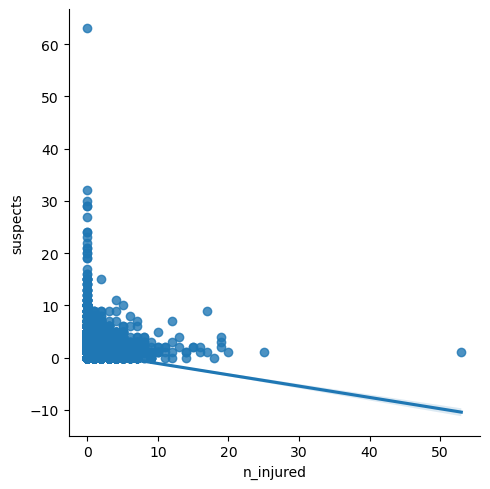

In [11]:
sns.lmplot(x = 'n_injured', y = 'suspects', data = sub1)

C:\Users\repla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


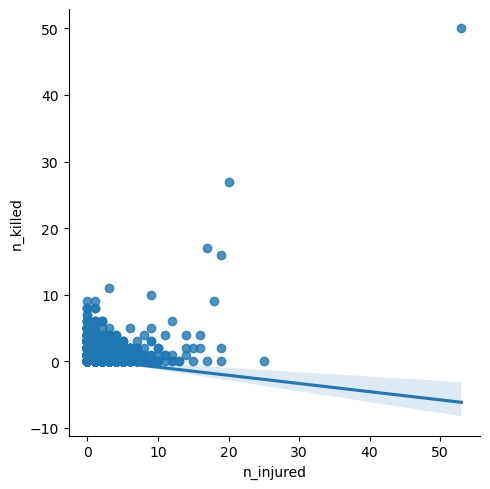

In [12]:
sns.lmplot(x = 'n_injured', y = 'n_killed', data = sub1)

C:\Users\repla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


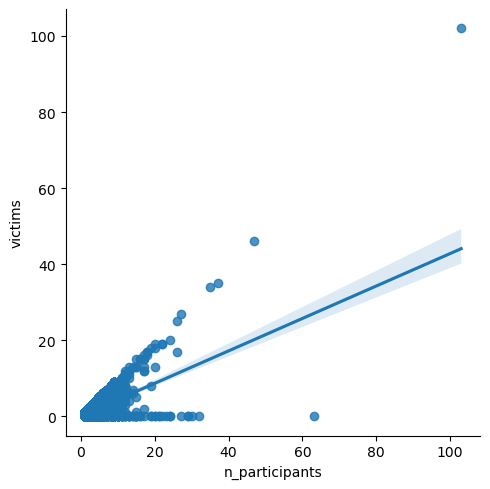

In [16]:
sns.lmplot(x = 'n_participants', y = 'victims', data = sub1) 
plt.savefig(r"C:\Users\repla\Documents\Exercise 6\4 - Analysis\Visualizations\part.victimsscatterplot.png")

C:\Users\repla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


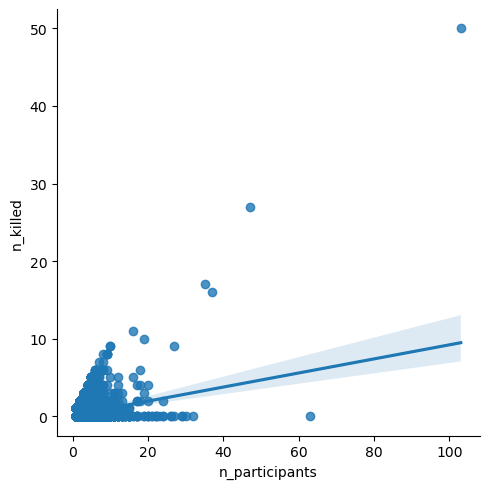

In [15]:
sns.lmplot(x = 'n_participants', y = 'n_killed', data = sub1) 
# Save the scatterplot as an image file



## Hypotheses Testing

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['n_participants'].values.reshape(-1,1)
y = df['n_killed'].values.reshape(-1,1)

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

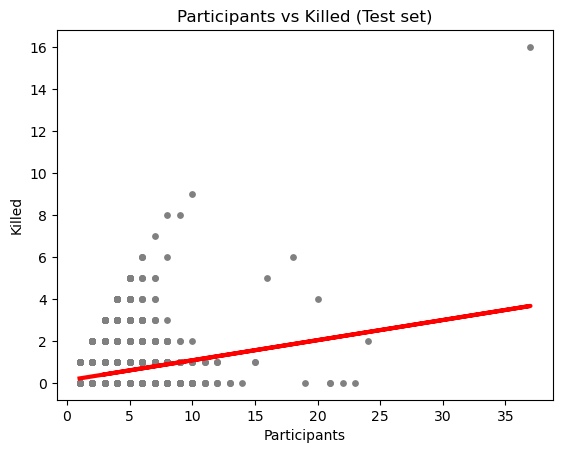

<Figure size 640x480 with 0 Axes>

In [30]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Participants vs Killed (Test set)')
plot_test.xlabel('Participants')
plot_test.ylabel('Killed')
plot_test.show()
plt.savefig(r"C:\Users\repla\Documents\Exercise 6\4 - Analysis\Visualizations\part.killed.test.png")

In [31]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [32]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.09590138]]
Mean squared error:  0.28953414491573193
R2 score:  0.024318451197310242


In [33]:
y_predicted

array([[0.40575645],
       [0.50165783],
       [0.21395368],
       ...,
       [0.21395368],
       [0.50165783],
       [0.21395368]])

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,0.405756
1,0,0.501658
2,0,0.213954
3,0,0.213954
4,1,0.309855
5,2,0.309855
6,0,0.213954
7,0,0.213954
8,0,0.309855
9,0,0.501658


In [35]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [36]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.09590138]]
Mean squared error:  0.30168182414957245
R2 score:  0.04278086669148495


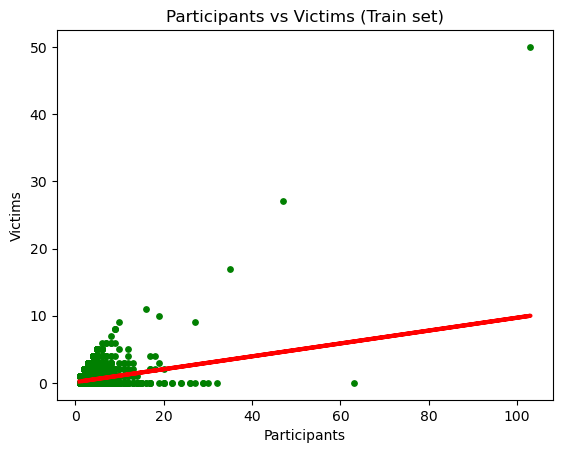

In [38]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Participants vs Victims (Train set)')
plot_test.xlabel('Participants')
plot_test.ylabel('Victims')
plot_test.show()